In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("m_sand_concrete_dataset.csv")
df

,Cement,M_sand,Fly_ash,W_B_ratio,Water_reducer,Gravel,Compressive_strength,CPC
0,404.791210,716.707805,25.596509,0.319968,3.913121,1278.338629,228.661746,162.619943
1,337.775688,638.563169,93.604357,0.478330,3.975574,1231.632520,193.437545,154.611738
2,421.719584,548.381534,16.460782,0.343852,4.730135,1209.436235,205.165174,148.979534
3,389.473606,650.313433,4.491062,0.547399,1.266917,1251.394066,189.348505,160.160457
4,268.835470,545.693631,43.509706,0.393100,2.950379,1012.045390,154.693854,132.971430
...,...,...,...,...,...,...,...,...
81,331.277372,742.475442,24.783956,0.580782,4.007409,1252.597963,208.001125,157.217033
82,412.804077,595.141668,23.666236,0.341222,1.192764,1016.670375,201.796756,139.879017
83,283.394584,785.869819,74.601428,0.587664,4.247044,1084.183431,191.573191,148.668242
84,254.542415,587.275351,81.656876,0.540265,0.286160,1100.239012,165.576196,130.780271


In [6]:
df.columns

Index(['Cement', 'M_sand', 'Fly_ash', 'W_B_ratio', 'Water_reducer', 'Gravel',
       'Compressive_strength', 'CPC'],
      dtype='object')

In [7]:
df.describe()

,Cement,M_sand,Fly_ash,W_B_ratio,Water_reducer,Gravel,Compressive_strength,CPC
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,349.275167,645.260415,50.947998,0.441829,2.600906,1147.173062,194.896776,148.745499
std,55.227983,83.479393,30.094982,0.088375,1.528603,81.518412,17.279651,8.664164
min,251.472454,506.483624,1.393629,0.306344,0.027149,1010.817950,154.693854,130.119056
25%,299.160117,580.487641,23.364615,0.356017,1.219834,1081.776385,185.697437,141.801995
50%,344.680113,645.344265,51.259415,0.441101,2.843453,1151.932559,194.594935,149.793205
75%,400.951269,713.778328,78.292380,0.519780,3.911458,1210.433687,206.915821,154.602822
max,445.124470,790.752913,99.237556,0.593871,4.995524,1294.061435,230.989566,165.231150


In [34]:
cm = df['Cement'].values
cs = df['Compressive_strength'].values
cm = (cm - cm.min())/(cm.max() - cm.min())
cm = cm.reshape(-1, 1)
cs = (cs - cs.min())/(cs.max() - cs.min())
cs = cs.reshape(-1, 1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cm, cs, test_size=0.3, random_state=42)

In [107]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [152]:
xgb = XGBRegressor(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=5,
    reg_lambda=5,
    objective='reg:squarederror',
    random_state=30
)

In [153]:
xgb.fit(X_train, y_train)

y_test_pred = xgb.predict(X_test)

test_rmse = mean_squared_error(y_test, y_test_pred)

print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 0.0305


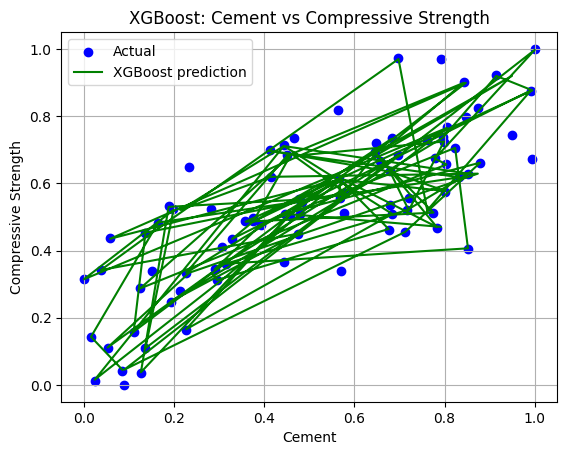

In [146]:
plt.scatter(cm, cs, color='blue', label='Actual')
plt.plot(cm, xgb.predict(cm), color='green', label='XGBoost prediction')
plt.xlabel("Cement")
plt.ylabel("Compressive Strength")
plt.title("XGBoost: Cement vs Compressive Strength")
plt.legend()
plt.grid(True)
plt.show()


In [154]:
rmse(cs, xgb.predict(cm)), r2_score(cs, xgb.predict(cm)), mean_absolute_error(cs, xgb.predict(cm))

(np.float64(0.11049650807446726), 0.759172018551274, 0.07802241487381978)